# Coursera Data Science Capstone Project
### The goal of this project is to find out if there is any relationship between number of places where alcohol is sold and number of accidents involving alcohol

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#item0">Business problem and data description</a>
    
2. <a href="#item1">Download and explore New York accidents data from 2019</a>

3. <a href="#item2">Explore Neighborhoods in New York City</a>

4. <a href="#item3">Exploring neighbourhoods using Foursquare</a>

5. <a href="#item4">Analyzing neighbourhoods in Brooklyn</a>

6. <a href="#item5">Clustering neighborhoods and visualizing the results</a>    
</font>
</div>

<a id='item0'></a>

## 1. Business problem and data description

### Business problem

In some of the previous labs and assignments, we had the opportunity to work with the location data of New York and Toronto to make clusters based on venue categories in neighborhoods. Also, in prior sections of the course, we were required to work with and analyze crime data of Chicago and San Francisco. This allowed me to come up with an idea for a project.
Nowadays there are many accidents involving alcohol, especially car accidents. The goal is to see if there is any relationship between such accidents and locations of places selling or serving alcohol in each of the neighborhoods. The police department, venue owners, or social workers may also be interested in the results of this study as it may provide insights relative to their fields.

### Data description

I will use data of accidents in New York city and then filter only those that were alcohol related (see chapter 2). Data is available here:
https://crashmapper.org/#/

Second source of data will be neighborhood list with their coordinates, available here: https://cocl.us/new_york_dataset Data will be presented and explored in chapter 3.

Last source of data will be Foursquare API containing information about venues in each neighborhood, described in chapter 4.

<a id='item1'></a>

## 2. Download and explore New York accidents data from 2019

**Importing libraries**

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!pip install folium
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [2]:
ny_acc_data = pd.read_csv("https://chekpeds.carto.com/api/v2/sql?q=SELECT%20c.cartodb_id%2C%20c.socrata_id%2C%20c.the_geom%2C%20c.on_street_name%2C%20c.cross_street_name%2C%20c.date_val%20AS%20date_time%2C%20c.latitude%2C%20c.longitude%2C%20c.borough%2C%20c.zip_code%2C%20c.crash_count%2C%20c.number_of_cyclist_injured%2C%20c.number_of_cyclist_killed%2C%20c.number_of_motorist_injured%2C%20c.number_of_motorist_killed%2C%20c.number_of_pedestrian_injured%2C%20c.number_of_pedestrian_killed%2C%20c.number_of_persons_injured%2C%20c.number_of_persons_killed%2C%20array_to_string(c.contributing_factor%2C%20%27%2C%27)%20as%20contributing_factors%2C%20array_to_string(c.vehicle_type%2C%20%27%2C%27)%20as%20vehicle_types%20FROM%20crashes_all_prod%20c%20JOIN%20nyc_neighborhood%20a%20ON%20ST_Within(c.the_geom%2C%20a.the_geom)%20WHERE%20(%20year%3A%3Atext%20%7C%7C%20LPAD(month%3A%3Atext%2C%202%2C%20%270%27)%20%3C%3D%20%272019%27%20%7C%7C%20LPAD(12%3A%3Atext%2C%202%2C%20%270%27)%20)%20AND%20(%20year%3A%3Atext%20%7C%7C%20LPAD(month%3A%3Atext%2C%202%2C%20%270%27)%20%3E%3D%20%272019%27%20%7C%7C%20LPAD(1%3A%3Atext%2C%202%2C%20%270%27)%20)%20%20AND%20(%20number_of_cyclist_injured%20%3E%200%20OR%20number_of_motorist_injured%20%3E%200%20OR%20number_of_pedestrian_injured%20%3E%200%20%20OR%20%20number_of_cyclist_killed%20%3E%200%20OR%20number_of_motorist_killed%20%3E%200%20OR%20number_of_pedestrian_killed%20%3E%200%20)%20AND%20(hasvehicle_car%20OR%20hasvehicle_truck%20OR%20hasvehicle_motorcycle%20OR%20hasvehicle_bicycle%20OR%20hasvehicle_suv%20OR%20hasvehicle_busvan%20OR%20hasvehicle_scooter%20OR%20hasvehicle_other%20OR%20(%20NOT%20hasvehicle_car%20AND%20NOT%20hasvehicle_truck%20AND%20NOT%20hasvehicle_motorcycle%20AND%20NOT%20hasvehicle_bicycle%20AND%20NOT%20hasvehicle_suv%20AND%20NOT%20hasvehicle_busvan%20AND%20NOT%20hasvehicle_scooter%20AND%20NOT%20hasvehicle_other%20))&format=CSV")
ny_acc_data.head()

,the_geom,crash_count,cartodb_id,on_street_name,cross_street_name,date_time,latitude,longitude,borough,zip_code,socrata_id,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,number_of_pedestrian_injured,number_of_pedestrian_killed,number_of_persons_injured,number_of_persons_killed,contributing_factors,vehicle_types
0,0101000020E61000009BC937DBDC7E52C07F4B00FE295D...,1,2509642,AVENUE A,NaN,2019-04-29 16:55:00+00,40.727844,-73.98223,Manhattan,10009.0,4124171,1,0,0,0,0,0,1,0,Alcohol Involvement,Bike
1,0101000020E61000001092054CE07E52C09FAD8383BD55...,1,2413283,6 AVENUE,NaN,2019-01-27 18:15:00+00,40.669846,-73.98244,Brooklyn,11215.0,4069947,1,0,0,0,0,0,1,0,Unspecified,Bike
2,0101000020E61000004B766C04E27752C08505F7031E60...,1,2470114,37 AVENUE,NaN,2019-02-12 13:10:00+00,40.750916,-73.87317,Queens,11372.0,4079675,0,0,1,0,0,0,1,0,"Pavement Slippery,Driver Inattention/Distraction","Sedan,Sedan"
3,0101000020E61000000E10CCD1E37952C088D7F50B7667...,1,2694970,BRUCKNER EXPRESSWAY,NaN,2019-10-26 18:30:00+00,40.808290,-73.90453,Bronx,NaN,4231750,0,0,3,0,0,0,3,0,"Driver Inattention/Distraction,Unspecified,Uns...","Sedan,Sedan,Sedan"
4,0101000020E610000036936FB6B97F52C0E884D041975C...,1,2694996,MULBERRY STREET,NaN,2019-10-25 17:00:00+00,40.723366,-73.99571,Manhattan,10012.0,4231476,0,0,1,0,0,0,1,0,Driver Inattention/Distraction,NaN


In [3]:
ny_acc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41406 entries, 0 to 41405
Data columns (total 21 columns):
the_geom                        41406 non-null object
crash_count                     41406 non-null int64
cartodb_id                      41406 non-null int64
on_street_name                  34540 non-null object
cross_street_name               6860 non-null object
date_time                       41406 non-null object
latitude                        41406 non-null float64
longitude                       41406 non-null float64
borough                         41402 non-null object
zip_code                        27469 non-null float64
socrata_id                      41406 non-null int64
number_of_cyclist_injured       41406 non-null int64
number_of_cyclist_killed        41406 non-null int64
number_of_motorist_injured      41406 non-null int64
number_of_motorist_killed       41406 non-null int64
number_of_pedestrian_injured    41406 non-null int64
number_of_pedestrian_killed     4

**Browsing constributing factors of the accident to see if there is any information about alcohol involvement**

In [4]:
ny_acc_data['contributing_factors'].value_counts().head(20)

Driver Inattention/Distraction,Unspecified                       5335
Unspecified,Unspecified                                          3915
Unspecified                                                      3579
Driver Inattention/Distraction                                   2760
Following Too Closely,Unspecified                                2666
Failure to Yield Right-of-Way                                    2298
Failure to Yield Right-of-Way,Unspecified                        2242
Driver Inattention/Distraction,Driver Inattention/Distraction    1480
Traffic Control Disregarded,Unspecified                           946
Driver Inattention/Distraction,Unspecified,Unspecified            792
Passing or Lane Usage Improper,Unspecified                        624
Turning Improperly,Unspecified                                    484
Unsafe Lane Changing,Unspecified                                  469
Backing Unsafely                                                  469
Unspecified,Unspecif

**Filtering only accidents in which alcohol was involved**

In [5]:
ny_acc_data.dropna(subset=['contributing_factors'], inplace=True)

ny_acc_data = ny_acc_data.loc[ny_acc_data['contributing_factors'].str.contains("Alcohol") ,
                        ['on_street_name', 'latitude', 'longitude', 'borough',
                        'zip_code', 'contributing_factors']]
ny_acc_data.reset_index(drop=True, inplace=True)
ny_acc_data.drop("contributing_factors", axis=1, inplace=True)
ny_acc_data.rename(columns={'on_street_name': 'venue','borough': 'Borough'}, inplace=True)
ny_acc_data.head(10)

,venue,latitude,longitude,Borough,zip_code
0,AVENUE A,40.727844,-73.982230,Manhattan,10009.0
1,BROADWAY,40.878310,-73.905230,Bronx,10463.0
2,HYLAN BOULEVARD,40.526760,-74.175740,Staten Island,10312.0
3,AVENUE O,40.617203,-73.917015,Brooklyn,11234.0
4,JUNCTION BOULEVARD,40.749157,-73.869430,Queens,NaN
5,HYLAN BOULEVARD,40.598557,-74.081764,Staten Island,10305.0
6,NaN,40.719850,-73.955560,Brooklyn,11211.0
7,GOWANUS EXPY (BQE),40.652515,-74.009410,Brooklyn,NaN
8,PENNSYLVANIA AVENUE,40.646152,-73.879875,Brooklyn,NaN
9,108 STREET,40.753937,-73.860300,Queens,NaN


In [6]:
ny_acc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 5 columns):
venue        505 non-null object
latitude     656 non-null float64
longitude    656 non-null float64
Borough      656 non-null object
zip_code     433 non-null float64
dtypes: float64(3), object(2)
memory usage: 25.7+ KB


In [7]:
ny_acc_by_borough = ny_acc_data.loc[:, 'Borough'].value_counts()
ny_acc_by_borough

Brooklyn         215
Queens           199
Bronx            115
Manhattan         79
Staten Island     48
Name: Borough, dtype: int64

In [8]:
brooklyn_acc_data = ny_acc_data.loc[ny_acc_data['Borough'] == 'Brooklyn', :]
brooklyn_acc_data.drop(columns='Borough', axis=1, inplace=True)
brooklyn_acc_data.reset_index(drop=True, inplace=True)
brooklyn_acc_data.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,venue,latitude,longitude,zip_code
0,AVENUE O,40.617203,-73.917015,11234.0
1,NaN,40.719850,-73.955560,11211.0
2,GOWANUS EXPY (BQE),40.652515,-74.009410,NaN
3,PENNSYLVANIA AVENUE,40.646152,-73.879875,NaN
4,CADMAN PLAZA WEST,40.702060,-73.992620,11201.0


In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

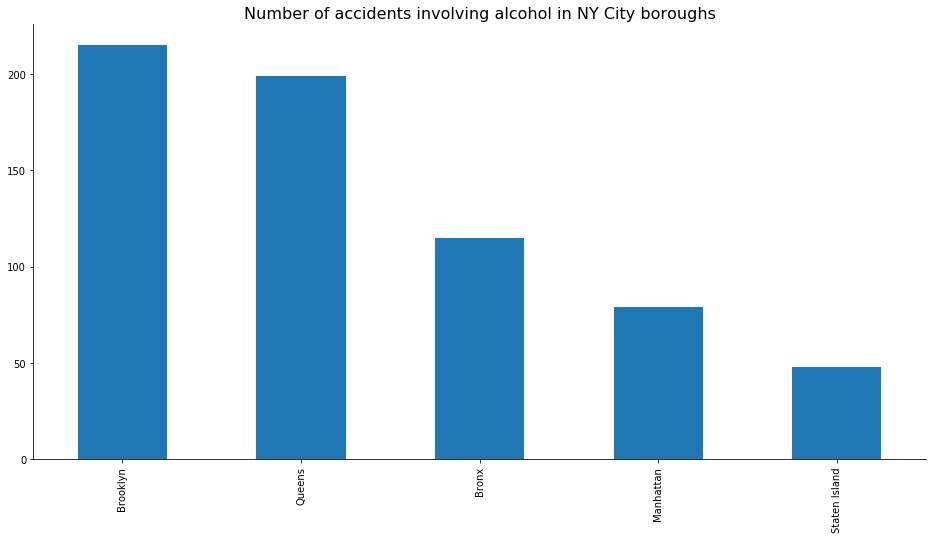

In [10]:
ax = ny_acc_by_borough.plot(kind='bar', 
            figsize=(16, 8), 
            width=0.5, 
           )

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title("Number of accidents involving alcohol in NY City boroughs", fontsize=16)

plt.show()

<a id='item2'></a>

## 3. Explore Neighborhoods in New York City

In [11]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [12]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [13]:
neighborhoods_data = newyork_data['features']
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [14]:
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [15]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


In [16]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


**Creating arrays of colors for particular boroughs on map**

In [17]:
boroughs_array = neighborhoods['Borough'].unique().tolist()
colors_array = cm.rainbow(np.linspace(0, 1, len(boroughs_array)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
colors_dict = dict(zip(boroughs_array, rainbow))
colors_dict                      

{'Bronx': '#8000ff',
 'Manhattan': '#00b5eb',
 'Brooklyn': '#80ffb4',
 'Queens': '#ffb360',
 'Staten Island': '#ff0000'}

In [18]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=colors_dict[borough],
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

**Getting data for Brooklyn**

In [19]:
brooklyn_data = neighborhoods[neighborhoods['Borough'] == 'Brooklyn'].reset_index(drop=True)
brooklyn_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Brooklyn,Bay Ridge,40.625801,-74.030621
1,Brooklyn,Bensonhurst,40.611009,-73.995180
2,Brooklyn,Sunset Park,40.645103,-74.010316
3,Brooklyn,Greenpoint,40.730201,-73.954241
4,Brooklyn,Gravesend,40.595260,-73.973471


In [20]:
# create map of New York using latitude and longitude values
map_brooklyn = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(brooklyn_data['Latitude'], brooklyn_data['Longitude'], brooklyn_data['Borough'], brooklyn_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_brooklyn)  
    
map_brooklyn

<a id='item3'></a>

## 4. Exploring neighbourhoods using Foursquare

In [21]:
CLIENT_ID = 'LDGQ24VJY4C1KHSHERWNOVRILOBCOEXLTRCEQ0I2IZUQQTBP' # your Foursquare ID
CLIENT_SECRET = 'WHEQZHEIEDFZ0EMV2BGVRT20DUKXNO4FTNE3QC5OYFQ02DF3' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: LDGQ24VJY4C1KHSHERWNOVRILOBCOEXLTRCEQ0I2IZUQQTBP
CLIENT_SECRET:WHEQZHEIEDFZ0EMV2BGVRT20DUKXNO4FTNE3QC5OYFQ02DF3


In [22]:
neighborhood_latitude = brooklyn_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = brooklyn_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = brooklyn_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Bay Ridge are 40.625801065010656, -74.03062069353813.


In [23]:
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=LDGQ24VJY4C1KHSHERWNOVRILOBCOEXLTRCEQ0I2IZUQQTBP&client_secret=WHEQZHEIEDFZ0EMV2BGVRT20DUKXNO4FTNE3QC5OYFQ02DF3&v=20180604&ll=40.625801065010656,-74.03062069353813&radius=500&limit=100'

In [24]:
import requests
results = requests.get(url).json()

In [25]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [26]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


<a id='item4'></a>

## 5. Analyzing neighbourhoods in Brooklyn

In [27]:
brooklyn_venues = getNearbyVenues(names=brooklyn_data['Neighborhood'],
                                   latitudes=brooklyn_data['Latitude'],
                                   longitudes=brooklyn_data['Longitude']
                                  )

In [28]:
print(brooklyn_venues.shape)
brooklyn_venues.head()

(2698, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bay Ridge,40.625801,-74.030621,Pilo Arts Day Spa and Salon,40.624748,-74.030591,Spa
1,Bay Ridge,40.625801,-74.030621,Bagel Boy,40.627896,-74.029335,Bagel Shop
2,Bay Ridge,40.625801,-74.030621,Leo's Casa Calamari,40.624200,-74.030931,Pizza Place
3,Bay Ridge,40.625801,-74.030621,Pegasus Cafe,40.623168,-74.031186,Breakfast Spot
4,Bay Ridge,40.625801,-74.030621,The Bookmark Shoppe,40.624577,-74.030562,Bookstore


In [29]:
brooklyn_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bath Beach,49,49,49,49,49,49
Bay Ridge,88,88,88,88,88,88
Bedford Stuyvesant,27,27,27,27,27,27
Bensonhurst,28,28,28,28,28,28
Bergen Beach,6,6,6,6,6,6
Boerum Hill,93,93,93,93,93,93
Borough Park,19,19,19,19,19,19
Brighton Beach,45,45,45,45,45,45
Broadway Junction,14,14,14,14,14,14


In [30]:
print('There are {} uniques categories.'.format(len(brooklyn_venues['Venue Category'].unique())))

There are 287 uniques categories.


In [31]:
brooklyn_venues = brooklyn_venues.loc[brooklyn_venues['Venue Category'].isin(['Sports Bar', 'Bar', 'Liquor Store', 'Cocktail Bar', 'Beer Store', 'Beer Bar', 
                                                                        'Wine Shop', 'Whisky Bar', 'Brewery', 'Wine Bar', 'Nightclub', 'Beer Garden', 'Distillery']), :]
brooklyn_venues.reset_index(drop=True, inplace=True)

In [32]:
brooklyn_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bay Ridge,40.625801,-74.030621,Windy City Ale House,40.628117,-74.029128,Sports Bar
1,Bay Ridge,40.625801,-74.030621,The Kettle Black,40.622839,-74.031411,Bar
2,Bay Ridge,40.625801,-74.030621,The Pour House of Bay Ridge,40.628517,-74.028963,Bar
3,Bay Ridge,40.625801,-74.030621,Harp Bar Brooklyn,40.629789,-74.028533,Bar
4,Bensonhurst,40.611009,-73.995180,Bensonhurst Liquors,40.613263,-73.996103,Liquor Store


In [33]:
brooklyn_alc_by_nbrh = brooklyn_venues['Neighborhood'].value_counts().to_frame().reset_index()
brooklyn_alc_by_nbrh.columns = ['Neighborhood', 'alc_shops']
brooklyn_alc_by_nbrh.head()

,Neighborhood,alc_shops
0,Greenpoint,16
1,Prospect Heights,16
2,South Side,15
3,Carroll Gardens,14
4,East Williamsburg,11


In [34]:
brooklyn_alc_by_nbrh = pd.merge(brooklyn_alc_by_nbrh, brooklyn_data[['Neighborhood', 'Latitude', 'Longitude']], how='inner', on=['Neighborhood'])
brooklyn_alc_by_nbrh.head()

,Neighborhood,alc_shops,Latitude,Longitude
0,Greenpoint,16,40.730201,-73.954241
1,Prospect Heights,16,40.676822,-73.964859
2,South Side,15,40.710861,-73.958001
3,Carroll Gardens,14,40.680540,-73.994654
4,East Williamsburg,11,40.708492,-73.938858


In [35]:
brooklyn_onehot = pd.get_dummies(brooklyn_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
brooklyn_onehot['Neighborhood'] = brooklyn_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [brooklyn_onehot.columns[-1]] + list(brooklyn_onehot.columns[:-1])
brooklyn_onehot = brooklyn_onehot[fixed_columns]

brooklyn_onehot.head()

,Neighborhood,Bar,Beer Bar,Beer Garden,Beer Store,Brewery,Cocktail Bar,Distillery,Liquor Store,Nightclub,Sports Bar,Whisky Bar,Wine Bar,Wine Shop
0,Bay Ridge,0,0,0,0,0,0,0,0,0,1,0,0,0
1,Bay Ridge,1,0,0,0,0,0,0,0,0,0,0,0,0
2,Bay Ridge,1,0,0,0,0,0,0,0,0,0,0,0,0
3,Bay Ridge,1,0,0,0,0,0,0,0,0,0,0,0,0
4,Bensonhurst,0,0,0,0,0,0,0,1,0,0,0,0,0


In [36]:
brooklyn_onehot = brooklyn_onehot.groupby('Neighborhood').mean().reset_index()
brooklyn_onehot.head()

,Neighborhood,Bar,Beer Bar,Beer Garden,Beer Store,Brewery,Cocktail Bar,Distillery,Liquor Store,Nightclub,Sports Bar,Whisky Bar,Wine Bar,Wine Shop
0,Bath Beach,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.00,0.0,0.0,0.000000
1,Bay Ridge,0.750000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.25,0.0,0.0,0.000000
2,Bedford Stuyvesant,0.400000,0.0,0.0,0.0,0.0,0.200000,0.0,0.0,0.0,0.00,0.0,0.2,0.200000
3,Bensonhurst,0.500000,0.0,0.0,0.0,0.0,0.000000,0.0,0.5,0.0,0.00,0.0,0.0,0.000000
4,Boerum Hill,0.571429,0.0,0.0,0.0,0.0,0.285714,0.0,0.0,0.0,0.00,0.0,0.0,0.142857


In [37]:
brooklyn_grouped = brooklyn_onehot.groupby('Neighborhood').mean().reset_index()
brooklyn_grouped.head()

,Neighborhood,Bar,Beer Bar,Beer Garden,Beer Store,Brewery,Cocktail Bar,Distillery,Liquor Store,Nightclub,Sports Bar,Whisky Bar,Wine Bar,Wine Shop
0,Bath Beach,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.00,0.0,0.0,0.000000
1,Bay Ridge,0.750000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.25,0.0,0.0,0.000000
2,Bedford Stuyvesant,0.400000,0.0,0.0,0.0,0.0,0.200000,0.0,0.0,0.0,0.00,0.0,0.2,0.200000
3,Bensonhurst,0.500000,0.0,0.0,0.0,0.0,0.000000,0.0,0.5,0.0,0.00,0.0,0.0,0.000000
4,Boerum Hill,0.571429,0.0,0.0,0.0,0.0,0.285714,0.0,0.0,0.0,0.00,0.0,0.0,0.142857


**Each neighborhood along with the top 5 most common venues**

In [38]:
num_top_venues = 5

for hood in brooklyn_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = brooklyn_grouped[brooklyn_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bath Beach----
         venue  freq
0   Sports Bar   1.0
1          Bar   0.0
2     Beer Bar   0.0
3  Beer Garden   0.0
4   Beer Store   0.0


----Bay Ridge----
         venue  freq
0          Bar  0.75
1   Sports Bar  0.25
2     Beer Bar  0.00
3  Beer Garden  0.00
4   Beer Store  0.00


----Bedford Stuyvesant----
          venue  freq
0           Bar   0.4
1  Cocktail Bar   0.2
2      Wine Bar   0.2
3     Wine Shop   0.2
4      Beer Bar   0.0


----Bensonhurst----
          venue  freq
0           Bar   0.5
1  Liquor Store   0.5
2      Beer Bar   0.0
3   Beer Garden   0.0
4    Beer Store   0.0


----Boerum Hill----
          venue  freq
0           Bar  0.57
1  Cocktail Bar  0.29
2     Wine Shop  0.14
3      Beer Bar  0.00
4   Beer Garden  0.00


----Broadway Junction----
         venue  freq
0    Nightclub   1.0
1          Bar   0.0
2     Beer Bar   0.0
3  Beer Garden   0.0
4   Beer Store   0.0


----Brooklyn Heights----
         venue  freq
0          Bar   0.4
1    Wine Shop   

<a id='item5'></a>

## 6. Clustering neighborhoods and visualizing the results

**Let's remind our data of accidents with alcohol involved**

In [39]:
brooklyn_acc_data.head()

,venue,latitude,longitude,zip_code
0,AVENUE O,40.617203,-73.917015,11234.0
1,NaN,40.719850,-73.955560,11211.0
2,GOWANUS EXPY (BQE),40.652515,-74.009410,NaN
3,PENNSYLVANIA AVENUE,40.646152,-73.879875,NaN
4,CADMAN PLAZA WEST,40.702060,-73.992620,11201.0


**Assigning neighbourhood names to venues**

In [40]:
neighb_coordinates = brooklyn_data.copy()
nbrh_names = []
for i in range(len(brooklyn_acc_data)):
    neighb_coordinates['diff'] = abs(neighb_coordinates['Latitude'] - brooklyn_acc_data.loc[i, 'latitude']) + abs(neighb_coordinates['Longitude'] - brooklyn_acc_data.loc[i, 'longitude'])
    nbrh = neighb_coordinates.nsmallest(1, 'diff').Neighborhood.iloc[0]
    nbrh_names.append(nbrh)

In [41]:
brooklyn_acc_data['Neighborhood'] = nbrh_names
brooklyn_acc_data.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,venue,latitude,longitude,zip_code,Neighborhood
0,AVENUE O,40.617203,-73.917015,11234.0,Mill Basin
1,NaN,40.719850,-73.955560,11211.0,North Side
2,GOWANUS EXPY (BQE),40.652515,-74.009410,NaN,Sunset Park
3,PENNSYLVANIA AVENUE,40.646152,-73.879875,NaN,Starrett City
4,CADMAN PLAZA WEST,40.702060,-73.992620,11201.0,Fulton Ferry


**Creating a dataframe with number of accidents with alcohol involvement for each neighborhood**

In [42]:
brooklyn_acc_by_nbrh = brooklyn_acc_data.loc[:, 'Neighborhood'].value_counts().to_frame().reset_index()
brooklyn_acc_by_nbrh.columns = ['Neighborhood', 'acc_count']
brooklyn_acc_by_nbrh.head(10)

,Neighborhood,acc_count
0,Bedford Stuyvesant,11
1,Sunset Park,11
2,Williamsburg,8
3,Bushwick,8
4,Rugby,7
5,East Williamsburg,6
6,Clinton Hill,6
7,New Lots,6
8,Remsen Village,6
9,Wingate,5


**Getting the coordinates of each neighbourhood**

In [43]:
brooklyn_acc_by_nbrh = pd.merge(brooklyn_acc_by_nbrh, brooklyn_data[['Neighborhood', 'Latitude', 'Longitude']], how='inner', on=['Neighborhood'])
brooklyn_acc_by_nbrh.head()

,Neighborhood,acc_count,Latitude,Longitude
0,Bedford Stuyvesant,11,40.687232,-73.941785
1,Sunset Park,11,40.645103,-74.010316
2,Williamsburg,8,40.707144,-73.958115
3,Bushwick,8,40.698116,-73.925258
4,Rugby,7,40.655572,-73.926882


In [44]:
# set number of clusters
kclusters = 3

brooklyn_acc_clustering = brooklyn_acc_by_nbrh[['acc_count']]

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(brooklyn_acc_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2], dtype=int32)

In [45]:
brooklyn_acc_by_nbrh.insert(0, 'Cluster Labels', kmeans.labels_)

brooklyn_acc_by_nbrh.head()

,Cluster Labels,Neighborhood,acc_count,Latitude,Longitude
0,0,Bedford Stuyvesant,11,40.687232,-73.941785
1,0,Sunset Park,11,40.645103,-74.010316
2,0,Williamsburg,8,40.707144,-73.958115
3,0,Bushwick,8,40.698116,-73.925258
4,2,Rugby,7,40.655572,-73.926882


### Drawing map with alcohol involved accidents clusters

In [46]:
acc_map_clusters = folium.Map(location=[brooklyn_acc_by_nbrh.loc[0, 'Latitude'], brooklyn_acc_by_nbrh.loc[0, 'Longitude']], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(brooklyn_acc_by_nbrh['Latitude'], brooklyn_acc_by_nbrh['Longitude'], brooklyn_acc_by_nbrh['Neighborhood'], brooklyn_acc_by_nbrh['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(acc_map_clusters)
       
acc_map_clusters

In [47]:
# set number of clusters
kclusters = 3

brooklyn_alc_clustering = brooklyn_alc_by_nbrh[['alc_shops']].sort_values(by='alc_shops', ascending=False)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(brooklyn_alc_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 1, 2, 2, 2, 2, 2], dtype=int32)

In [48]:
brooklyn_alc_by_nbrh.insert(0, 'Cluster Labels', kmeans.labels_)

brooklyn_alc_by_nbrh.head()

,Cluster Labels,Neighborhood,alc_shops,Latitude,Longitude
0,1,Greenpoint,16,40.730201,-73.954241
1,1,Prospect Heights,16,40.676822,-73.964859
2,1,South Side,15,40.710861,-73.958001
3,1,Carroll Gardens,14,40.680540,-73.994654
4,1,East Williamsburg,11,40.708492,-73.938858


### Drawing map with alcohol-related shops locations

In [49]:
alc_map_clusters = folium.Map(location=[brooklyn_alc_by_nbrh.loc[0, 'Latitude'], brooklyn_alc_by_nbrh.loc[0, 'Longitude']], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(brooklyn_alc_by_nbrh['Latitude'], brooklyn_alc_by_nbrh['Longitude'], brooklyn_alc_by_nbrh['Neighborhood'], brooklyn_alc_by_nbrh['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(alc_map_clusters)
       
alc_map_clusters

### Discussion

Due to time constraints and my current knowledge with data science, not all methods were exhausted. 
For example, I could have investigated the problem on th venue level, without aggregation to neighbourhood level.

**Observations**

There was a total of 656 accidents in New York city with alcohol involved in 2019, which isn't that much. I've decided to pick the borough with the largest amount of such accidents, which was Brooklyn (215). 
Foursquare let me gather the information about alcohol-related places located in Brooklyn venues such as bars, liquour stores, etc.

**Conclusion**

Comparing information about accidents involving alcohol and number of alcohol-related places in each neighbourhood has shown, that there is no strong relationship between these two. This can be further investigated by finding potential relationship on a venue level. However, bar located in particular venue doesn't have to indicate higher possibility of accident in this venue, since drunk people can move to the other venues pretty quickly.